In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas_datareader import DataReader
from pandas import Series, DataFrame

In [2]:
# 予想したい日の前日
filedate = '20220415'
# 機械学習累積データ作成日
filedateAC = '20220415'

In [3]:
# 予想のために作成したinputデータ（予想したい日の前日）
df_inputai_c = pd.read_csv('data/inputAI_' + filedate + '.csv', index_col=0, header=[0], parse_dates=[0])

In [4]:
# 事前に作成した機械学習用データ（機械学習累積データ作成日）
df_target = pd.read_csv('data/inputAIAC_' + filedateAC + '.csv', index_col=0, header=[0], parse_dates=[0])

In [5]:
# ここからscikit-learn用のデータクラスを持つオブジェクトを作る
import sklearn

In [6]:
stockanalysis = sklearn.utils.Bunch()

In [7]:
# Key_xを削除
df_target = df_target.drop('key_x', axis=1)

In [8]:
# 当日の前日比'Diff'を目的変数"target"とする
stockanalysis['target'] = df_target['Diff_y']

In [9]:
# 説明変数を"data"に入れる
stockanalysis['data'] = df_target.iloc[:, 0:102]

In [10]:
# 特徴量の名前も入れておく
# stockanalysis['feature_names'] = ['PER', 'PBR', 'HAITO',
#                                  'ROE', 'ROA', 'MA05',
#                                  'MA25', 'MA75', 'RSI',
#                                  'AdjClose', 'Close', 'High',            
#                                  'Low', 'Open', 'Volume',           
#                                  'INDR4', 'TSPLB', 'TSPLS',
#                                  'PIN80B', 'PIN80S', 'Diff']

In [11]:
# 訓練セットとテストセットに分割
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
stockanalysis['data'], stockanalysis['target'], random_state=0)

In [12]:
# データ読み込み完了
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(41275, 102) (13759, 102) (41275,) (13759,)


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lreg = LinearRegression()

In [15]:
# fitでモデルを作りますが、使うのは学習用のデータだけです。
lreg.fit(X_train, Y_train)

LinearRegression()

In [16]:
# 回帰係数
print(lreg.coef_)
# 切片（誤差）
print(lreg.intercept_)
# 決定係数
print(lreg.score(X_train, Y_train))

[ 9.41587167e-07 -7.04814247e-05 -3.30323766e-04  1.07221109e-05
  1.14159880e-04  1.25939221e-03 -2.91426210e-04 -6.09260150e-05
 -9.82511715e-05 -1.56354592e-04  1.16585723e-04  1.86252401e-05
  3.56785414e-05 -2.02261261e-05 -3.65902691e-10  3.49809707e-04
 -3.66431415e-04  1.70892066e-05  3.53723318e-05 -4.86714489e-05
  5.71352933e-10 -2.43343989e-04  2.79467351e-04 -1.12206855e-05
 -2.24340687e-05  2.47078809e-05 -1.46936384e-10 -1.08282675e-04
  9.87889443e-05  9.92883621e-06 -2.55071264e-06 -4.27199806e-06
  2.79211085e-10 -2.99523037e-05  2.21994618e-05  2.23665747e-06
  2.15426103e-06  1.75757946e-05 -6.87322388e-10 -1.45245222e-04
  9.06184652e-05  1.57728715e-05  3.62957674e-05 -2.46369969e-05
  7.93558789e-11  2.77334696e-05 -3.76255026e-05  3.21299015e-05
  2.44257491e-05 -2.37509781e-05 -2.07348565e-11 -6.22368717e-05
  7.27012185e-05  1.10499987e-05 -2.43372504e-05 -1.04711532e-05
 -2.11767379e-10  7.74390295e-04 -7.96775601e-04  1.63652355e-05
  1.13387093e-06  1.59658

In [17]:
# 予測を、学習用のデータと、テスト用のデータ、両方でやる。
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [18]:
print('X_trainを使ったモデルの平均二乗誤差＝{:0.2f}'.format(np.mean(((Y_train - pred_train)*100) ** 2)))
    
print('X_testを使ったモデルの平均二乗誤差＝{:0.2f}'.format(np.mean(((Y_test - pred_test)*100) ** 2)))

X_trainを使ったモデルの平均二乗誤差＝4.70
X_testを使ったモデルの平均二乗誤差＝14593.23


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Text(0.5, 1.0, 'Residual Plots')

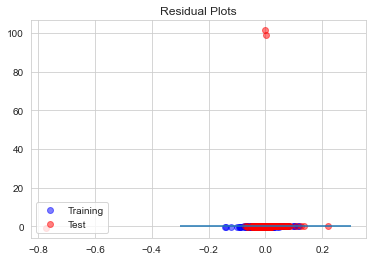

In [20]:
# 学習用のデータの残差プロットです。
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# テスト用のデータの残差プロットです。
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# y=0の水平な線を描いておきます。
plt.hlines(y=0,xmin=-0.3,xmax=0.3)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

In [21]:
# Key_xを削除
df_analysis = df_inputai_c.drop('key', axis=1)

In [22]:
df_analysis.columns

Index(['PER', 'PBR', 'HAITO', 'ROE_x', 'ROA_x', 'MA05', 'MA25', 'MA75', 'RSI',
       'AdjClose_c',
       ...
       '純利益', 'EPS', 'ROE_y', 'ROA_y', '一株配当', '剰余金の配当', '自社株買い', '配当性向',
       '総還元性向', '純資産配当率'],
      dtype='object', length=102)

In [23]:
# 説明変数を"data"に入れる
df_analysis = df_analysis.iloc[:, 0:102]

In [24]:
# 翌日の株価予想
pred_test = lreg.predict(df_analysis)

In [25]:
# 翌日の株価予想データ取得
np.savetxt('data/predict_' + filedate + '.csv', pred_test)

In [26]:
df_analysis.iloc[:, 0:102]

,PER,PBR,HAITO,ROE_x,ROA_x,MA05,MA25,MA75,RSI,AdjClose_c,...,純利益,EPS,ROE_y,ROA_y,一株配当,剰余金の配当,自社株買い,配当性向,総還元性向,純資産配当率
コード,,,,,,,,,,,,,,,,,,,,,
1301,9.06,0.86,2.47,10.5,4.3,-0.31,-3.54,0.29,25.66,3235.0,...,3.838000e+09,356.90,9.50,3.30,80.0,7.540000e+08,82000000.0,19.65,21.78,2.4
1352,12.76,1.46,1.64,12.0,2.9,-0.02,-0.11,21.62,40.00,1217.0,...,7.980000e+08,95.30,11.43,1.93,20.0,1.670000e+08,0.0,20.93,0.00,2.4
1376,12.84,0.85,1.83,6.8,3.7,-1.18,-1.69,2.39,47.72,1581.0,...,1.436066e+09,123.09,6.62,3.03,29.0,3.286890e+08,781000.0,22.89,22.94,1.6
1377,23.45,1.60,0.95,7.2,7.9,-1.59,6.56,15.17,62.07,4015.0,...,7.636000e+09,171.22,6.84,5.74,38.0,1.472000e+09,2000000.0,19.28,19.30,1.6
1379,15.30,1.15,3.04,7.7,6.5,-0.22,-0.07,0.92,46.36,1971.0,...,4.038000e+09,128.83,7.46,4.03,60.0,1.901000e+09,1000000.0,47.08,47.10,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,42.48,0.80,1.91,1.9,1.6,0.48,0.78,5.48,49.01,3760.0,...,7.895000e+09,88.51,1.89,0.71,72.0,6.778000e+09,1000000.0,85.85,85.86,1.5
9989,13.77,1.70,2.35,12.9,12.9,-0.91,-1.82,-1.29,38.63,2984.0,...,2.532900e+10,216.67,12.35,8.21,70.0,8.066000e+09,0.0,31.84,31.84,4.2
9991,6.30,0.48,4.45,7.9,6.4,-0.05,-3.70,-3.25,34.88,787.0,...,4.549000e+09,124.98,7.61,4.42,35.0,1.274000e+09,1000000.0,28.01,28.03,2.2
